In [1]:
import numpy as np
import pandas as pd
import requests
from cfbd.rest import ApiException
import cfbd
import json

In [2]:
dataset = pd.DataFrame()

In [3]:
# # Configure API key authorization: ApiKeyAuth
# configuration = cfbd.Configuration()
# configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# for year in range (2021, 2025):
#     api_config = cfbd.ApiClient(configuration)
#     for week in range (1,16):
#         response = plays = cfbd.PlaysApi(api_config).get_plays(year=year, week=week, offense='Michigan')
#         data = (pd.DataFrame.from_records([p.to_dict() for p in plays]))
#         dataset = pd.concat([dataset, data]) 
          
      
# dataset

In [4]:

# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
configuration.api_key_prefix['Authorization'] = 'Bearer'
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# create an instance of the API class
api_instance = cfbd.StatsApi(cfbd.ApiClient(configuration))
#year = 2023 # int | Year filter (required if no team specified) (optional)
team = 'michigan' # str | Team filter (required if no year specified) (optional)
#conference = 'conference_example' # str | Conference abbreviation filter (optional)
#start_week = 0 # int | Starting week filter (optional)
#end_week = 12 # int | Starting week filter (optional)

for year in range (2021, 2025):
    print(year)
    # Team statistics by season
    api_response = api_instance.get_team_season_stats(year=year, team=team)
    data = (pd.DataFrame.from_records([p.to_dict() for p in api_response]))
    dataset = pd.concat([dataset, data]) 

dataset.head(100)

2021
2022
2023
2024


,season,team,conference,stat_name,stat_value
0,2021,Michigan,Big Ten,netPassingYards,3202
1,2021,Michigan,Big Ten,kickReturnTDs,1
2,2021,Michigan,Big Ten,passingTDs,21
3,2021,Michigan,Big Ten,puntReturnYards,364
4,2021,Michigan,Big Ten,thirdDownConversions,87
...,...,...,...,...,...
31,2023,Michigan,Big Ten,interceptions,5
0,2024,Michigan,Big Ten,tacklesForLoss,69
1,2024,Michigan,Big Ten,turnovers,17
2,2024,Michigan,Big Ten,thirdDowns,146


In [5]:
gp_2022 = 14
gp_2023 = 15
gp_2024 = 11

In [6]:
data2022 = dataset[dataset['season'] == 2022]
data2023 = dataset[dataset['season'] == 2023]
data2024 = dataset[dataset['season'] == 2024]

In [7]:
data2022['avg'] = round((data2022['stat_value']/gp_2022), 2)
data2023['avg'] = round((data2023['stat_value']/gp_2023), 2)
data2024['avg'] = round((data2024['stat_value']/gp_2024), 2)

/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_14576/2072799299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022['avg'] = round((data2022['stat_value']/gp_2022), 2)
/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_14576/2072799299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2023['avg'] = round((data2023['stat_value']/gp_2023), 2)
/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_14576/2072799299.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [8]:
dataset['stat_name'].unique()

array(['netPassingYards', 'kickReturnTDs', 'passingTDs',
       'puntReturnYards', 'thirdDownConversions', 'interceptionTDs',
       'passCompletions', 'puntReturnTDs', 'totalYards',
       'passesIntercepted', 'rushingTDs', 'penalties', 'rushingAttempts',
       'interceptions', 'interceptionYards', 'tacklesForLoss',
       'kickReturns', 'fumblesLost', 'puntReturns',
       'fourthDownConversions', 'penaltyYards', 'fumblesRecovered',
       'possessionTime', 'thirdDowns', 'sacks', 'kickReturnYards',
       'firstDowns', 'fourthDowns', 'games', 'passAttempts', 'turnovers',
       'rushingYards'], dtype=object)

In [9]:
uni_2022 = data2022[data2022['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2022 = uni_2022.drop_duplicates()

uni_2023 = data2023[data2023['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2023 = uni_2023.drop_duplicates()

uni_2024 = data2024[data2024['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2024 = uni_2024.drop_duplicates()


In [10]:
combined_df = pd.concat([uni_2022, uni_2023, uni_2024])
combined_df = combined_df.reset_index()
combined_df.head(10)

,index,season,team,conference,stat_name,stat_value,avg
0,6,2022,Michigan,Big Ten,rushingYards,3344,238.86
1,31,2022,Michigan,Big Ten,netPassingYards,3078,219.86
2,4,2023,Michigan,Big Ten,rushingYards,2536,169.07
3,24,2023,Michigan,Big Ten,netPassingYards,3205,213.67
4,7,2024,Michigan,Big Ten,rushingYards,1758,159.82
5,25,2024,Michigan,Big Ten,netPassingYards,1541,140.09


In [11]:
combined_df = combined_df.sort_values(by=['season', 'stat_name'])

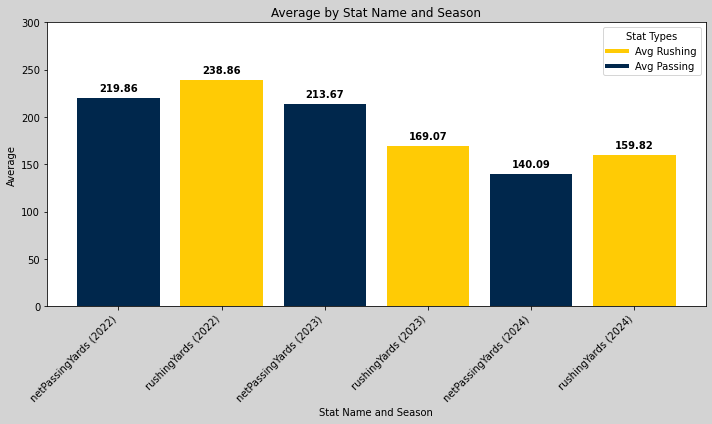

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend entries

df = combined_df

# Combine `stat_name` and `season` for x-axis labels
df['label'] = df['stat_name'] + " (" + df['season'].astype(str) + ")"

# Plot the bar chart with a lighter grey background
plt.figure(figsize=(10, 6), facecolor='lightgrey')

# Create bars with different colors (Maize for Rushing and Blue for Passing)
bars = plt.bar(df['label'], df['avg'], color=['#FFCB05' if stat == 'rushingYards' else '#00274C' for stat in df['stat_name']])

# Add labels and title
plt.xlabel('Stat Name and Season')
plt.ylabel('Average')
plt.title('Average by Stat Name and Season')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the avg value at the top of each bar, closer to the bar
for bar, avg in zip(bars, df['avg']):
    yval = bar.get_height()  # Get the height of the bar (y-value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Adjust the vertical position (lower the text)
             f'{avg:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Manually set the y-axis limit to 300
plt.ylim(0, 300)  # Set the limit from 0 to 300 on the y-axis

# Create a custom legend for "Avg Rushing" and "Avg Passing"
legend_elements = [
    Line2D([0], [0], color='#FFCB05', lw=4, label='Avg Rushing'),  # Maize color for Rushing
    Line2D([0], [0], color='#00274C', lw=4, label='Avg Passing')   # Blue color for Passing
]

# Add the legend with custom entries
plt.legend(handles=legend_elements, title='Stat Types', loc='upper right')

#Save the plot:
plt.savefig('average_stats_by_season.png', format='png', dpi=300, bbox_inches='tight')  # `bbox_inches='tight'` ensures everything is included in the saved image
# Show the plot
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


In [ ]:

# # Configure API key authorization: ApiKeyAuth
# configuration = cfbd.Configuration()
# configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
# configuration.api_key_prefix['Authorization'] = 'Bearer'
# # Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# # configuration.api_key_prefix['Authorization'] = 'Bearer'

# # create an instance of the API class
# api_instance = cfbd.StatsApi(cfbd.ApiClient(configuration))
# #year = 2023 # int | Year filter (required if no team specified) (optional)
# team = 'michigan' # str | Team filter (required if no year specified) (optional)
# #conference = 'conference_example' # str | Conference abbreviation filter (optional)
# #start_week = 0 # int | Starting week filter (optional)
# #end_week = 12 # int | Starting week filter (optional)

# for year in range (2021, 2025):
#     print(year)
#     # Team statistics by season
#     api_response = api_instance.get_advanced_team_game_stats(year=year, team=team)
#     data = (pd.DataFrame.from_records([p.to_dict() for p in api_response]))
#     dataset = pd.concat([dataset, data]) 

# pd.set_option('display.max_colwidth', None)  # Allow unlimited column width
# dataset.head(100)

In [3]:
# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
configuration.api_key_prefix['Authorization'] = 'Bearer'

for year in range (2024, 2025):
    api_config = cfbd.ApiClient(configuration)
    for week in range (1,16):
        response = plays = cfbd.PlaysApi(api_config).get_plays(year=year, week=week, offense='Michigan')
        data = (pd.DataFrame.from_records([p.to_dict() for p in plays]))
        dataset = pd.concat([dataset, data]) 
          
      
dataset

,id,drive_id,game_id,drive_number,play_number,offense,offense_conference,offense_score,defense,home,...,yard_line,yards_to_goal,down,distance,yards_gained,scoring,play_type,play_text,ppa,wallclock
0,401628452101849906,4016284521,401628452,1,1,Michigan,Big Ten,0,Fresno State,Michigan,...,35,65,0,0,0,False,Kickoff,Tommy Doman kickoff for 65 yds for a touchback,NaN,2024-08-31T23:35:05.000Z
1,401628452101866803,4016284522,401628452,2,1,Michigan,Big Ten,0,Fresno State,Michigan,...,69,31,1,10,2,False,Rush,Donovan Edwards run for 2 yds to the FRES 29,-0.310018,2024-08-31T23:37:30.000Z
2,401628452101866804,4016284522,401628452,2,2,Michigan,Big Ten,0,Fresno State,Michigan,...,71,29,2,8,13,False,Pass Reception,Davis Warren pass complete to Colston Loveland...,0.583241,2024-08-31T23:37:30.000Z
3,401628452101866805,4016284522,401628452,2,3,Michigan,Big Ten,0,Fresno State,Michigan,...,84,16,1,10,9,False,Rush,Semaj Morgan run for 9 yds to the FRES 7,0.615841,2024-08-31T23:39:17.000Z
4,401628452101866806,4016284522,401628452,2,4,Michigan,Big Ten,0,Fresno State,Michigan,...,97,3,1,3,0,False,Rush,Donovan Edwards run for no gain to the FRES 3,-0.746973,2024-08-31T23:39:17.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,401628557104947501,40162855718,401628557,18,13,Michigan,Big Ten,38,Northwestern,Michigan,...,90,10,3,10,0,False,Pass Incompletion,Davis Warren pass incomplete to Tyler Morris,-0.435155,2024-11-23T23:24:21.000Z
85,401628557104947701,40162855718,401628557,18,14,Michigan,Big Ten,41,Northwestern,Michigan,...,90,10,4,10,28,True,Field Goal Good,Dominic Zvada 28 yd FG GOOD,NaN,2024-11-23T23:25:03.000Z
86,401628557104948401,40162855719,401628557,19,1,Michigan,Big Ten,41,Northwestern,Michigan,...,35,65,1,10,14,False,Kickoff Return (Offense),"Tommy Doman kickoff for 65 yds , Joseph Himon ...",NaN,2024-11-23T23:28:46.000Z
87,401628557104958902,40162855720,401628557,20,2,Michigan,Big Ten,50,Northwestern,Michigan,...,80,20,1,10,20,True,Rushing Touchdown,"T. Dunlap run for 20 yds for a TD,Michigan pen...",2.617928,2024-11-23T23:34:15.000Z


In [20]:
print(dataset.columns.tolist())

['id', 'drive_id', 'game_id', 'drive_number', 'play_number', 'offense', 'offense_conference', 'offense_score', 'defense', 'home', 'away', 'defense_conference', 'defense_score', 'period', 'clock', 'offense_timeouts', 'defense_timeouts', 'yard_line', 'yards_to_goal', 'down', 'distance', 'yards_gained', 'scoring', 'play_type', 'play_text', 'ppa', 'wallclock']


In [21]:
#choose data for predicting the plays. Not all data we have is going to be relevant 
data = dataset[['game_id','home', 'away', 'offense_score', 'defense_score', 'period', 'clock', 'yards_to_goal', 'down', 'distance', 'yards_gained', 'play_type']]

data

,game_id,home,away,offense_score,defense_score,period,clock,yards_to_goal,down,distance,yards_gained,play_type
0,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 15, 'seconds': 0}",65,0,0,0,Kickoff
1,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",31,1,10,2,Rush
2,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",29,2,8,13,Pass Reception
3,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",16,1,10,9,Rush
4,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",3,1,3,0,Rush
...,...,...,...,...,...,...,...,...,...,...,...,...
84,401628557,Michigan,Northwestern,38,6,4,"{'minutes': 5, 'seconds': 24}",10,3,10,0,Pass Incompletion
85,401628557,Michigan,Northwestern,41,6,4,"{'minutes': 5, 'seconds': 22}",10,4,10,28,Field Goal Good
86,401628557,Michigan,Northwestern,41,6,4,"{'minutes': 5, 'seconds': 15}",65,1,10,14,Kickoff Return (Offense)
87,401628557,Michigan,Northwestern,50,6,4,"{'minutes': 4, 'seconds': 10}",20,1,10,20,Rushing Touchdown


In [22]:
data = data[data['play_type'] == 'Rush']
data.head()

,game_id,home,away,offense_score,defense_score,period,clock,yards_to_goal,down,distance,yards_gained,play_type
1,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",31,1,10,2,Rush
3,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",16,1,10,9,Rush
4,401628452,Michigan,Fresno State,0,0,1,"{'minutes': 13, 'seconds': 31}",3,1,3,0,Rush
7,401628452,Michigan,Fresno State,7,0,1,"{'minutes': 8, 'seconds': 19}",73,1,10,8,Rush
8,401628452,Michigan,Fresno State,7,0,1,"{'minutes': 8, 'seconds': 19}",65,2,2,5,Rush


In [11]:
data['yards_gained'].sum()

1661

In [25]:
grouped_df = data.groupby(['game_id','home', 'away'], as_index=False).agg({'yards_gained': 'sum'})
grouped_df = grouped_df.sort_values(by='game_id', ascending=True)
grouped_df.head(100)

,game_id,home,away,yards_gained
0,401628347,Michigan,Texas,81
1,401628452,Michigan,Fresno State,157
2,401628479,Michigan,Arkansas State,267
3,401628489,Michigan,USC,199
4,401628497,Michigan,Minnesota,136
5,401628505,Washington,Michigan,148
6,401628518,Illinois,Michigan,141
7,401628529,Michigan,Michigan State,132
8,401628536,Michigan,Oregon,143
9,401628541,Indiana,Michigan,100
